<a href="https://colab.research.google.com/github/sahalkhan22/image-classification/blob/main/image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.transform import resize


In [3]:
import os
import numpy as np

In [4]:
target = []
images = []
flat_data = []

DATADIR = '/content/drive/MyDrive/images'
    


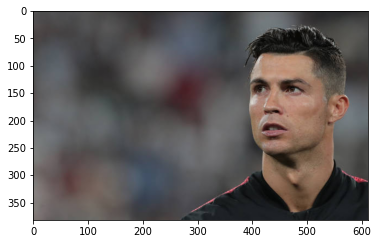

In [5]:
CATEGORIES = ['messi','ronaldo']

for category in CATEGORIES:
  class_num = CATEGORIES.index(category)
  path = os.path.join(DATADIR,category)
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    plt.imshow(img_array)
    img_resized = resize(img_array,(150,150,3))
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(class_num)

flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)   


In [6]:
flat_data

array([[0.35053856, 0.25168627, 0.07986667, ..., 0.23921569, 0.43529412,
        0.00797386],
       [0.13018301, 0.21411111, 0.28704575, ..., 0.4       , 0.47843137,
        0.10588235],
       [0.23529412, 0.35686275, 0.46666667, ..., 0.26666667, 0.19607843,
        0.21048366],
       ...,
       [0.75631373, 0.91945098, 0.99788235, ..., 0.18823529, 0.26666667,
        0.29019608],
       [0.01780392, 0.01780392, 0.02564706, ..., 0.08023529, 0.07239216,
        0.07631373],
       [0.3254902 , 0.31764706, 0.32156863, ..., 0.11372549, 0.1254902 ,
        0.14901961]])

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,test_size=0.3,random_state=109)
                                                 

In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid = [ 
               {'C':[1,10,100,1000],'kernel':['linear']},
               {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']},
]

svc = svm.SVC(probability=True)
clf = GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [11]:
y_pred = clf.predict(x_test)
y_pred


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [12]:
y_test

array([1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1])

In [9]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [13]:
accuracy_score(y_pred,y_test)

0.36363636363636365

In [14]:
confusion_matrix(y_pred,y_test)

array([[4, 7],
       [0, 0]])

In [15]:
#saving the model
import pickle
pickle.dump(clf,open('img_model.p','wb'))
model = pickle.load(open('img_model.p','rb'))

enter you urlhttps://media.gettyimages.com/photos/lionel-messi-of-barcelona-celebrates-after-scoring-his-teams-third-picture-id1045151438?k=6&m=1045151438&s=612x612&w=0&h=uk1_4uXHKtZQTnbONAK5DDh3SHDWI6OlUWEbMH9H2s8=
(412, 612, 3)
 PREDICTED OUTPUT: messi


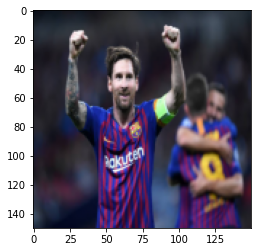

In [18]:
#testing a new sample
flat_data = []
url = input('enter you url')
img = imread(url)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data=np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f' PREDICTED OUTPUT: {y_out}')